### Igor Ratajczyk 400513
## Lab 1

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

2.

In [2]:
SAMPLES_COUNT: int = 1000

# samples of uniform distribution
uniform: np.ndarray = np.random.uniform(0, 1, SAMPLES_COUNT)

# samples of normal distribution
sigma1: float = 1. 
sigma2: float = 10.
normal: np.ndarray = np.random.normal(0, 1, SAMPLES_COUNT)
normal_wider: np.ndarray = np.random.normal(0, 10, SAMPLES_COUNT)

# samples of beta distribution
# beta1: np.ndarray = np.random.beta(0, 0, SAMPLES_COUNT)
beta2: np.ndarray = np.random.beta(2, 2, SAMPLES_COUNT)
beta3: np.ndarray = np.random.beta(3, 9, SAMPLES_COUNT)

mu: np.ndarray = np.array([0, 0])
cov1: np.ndarray = np.array(
    [
        [1, 0],
        [0, 1]
    ]
)

cov2: np.ndarray = np.array(
    [
        [2, 1],
        [1, 2]
    ]
)

normal_md1: np.ndarray = np.random.multivariate_normal(mu, cov1, 10000)
normal_md2: np.ndarray = np.random.multivariate_normal(mu, cov2, 10000)

3.

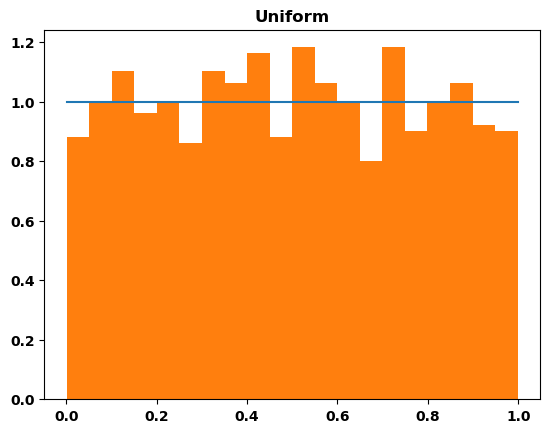

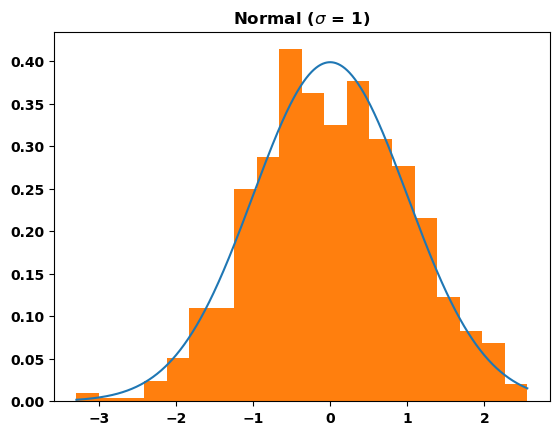

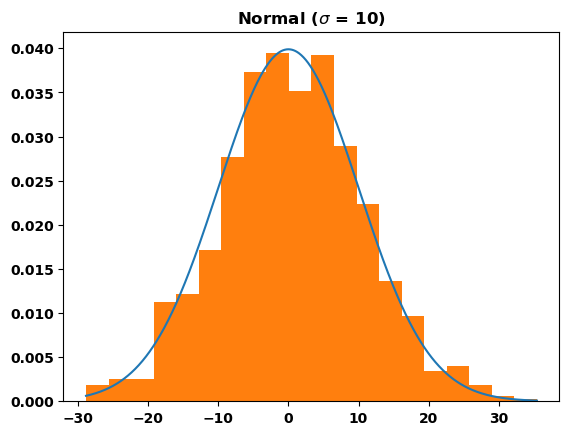

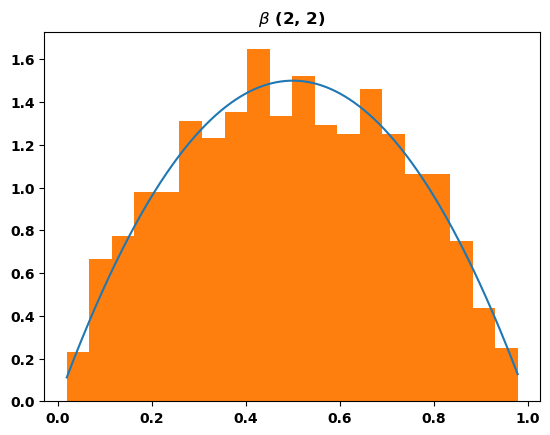

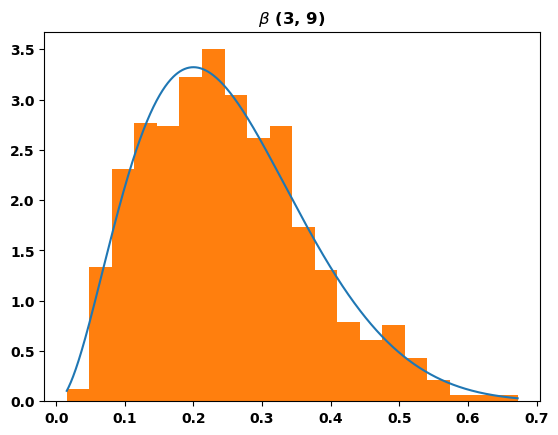

In [3]:
for emp, ground_truth, label in zip(
    (uniform, normal, normal_wider, beta2, beta3), 
    ((stats.uniform, (0,1)),(stats.norm, (0, sigma1)), (stats.norm, (0, sigma2)), (stats.beta, (2, 2)), (stats.beta, (3, 9))),
    ("Uniform", r"Normal ($\sigma$ = 1)", r"Normal ($\sigma$ = 10)", r"$\beta$ (2, 2)", r"$\beta$ (3, 9)")):
    domain = np.linspace(np.min(emp), np.max(emp), 1000)
    plt.figure()
    plt.title(label)
    plt.plot(domain, ground_truth[0].pdf(domain, *ground_truth[1]))
    plt.hist(emp, bins=20, density=True)
    plt.show()

4.

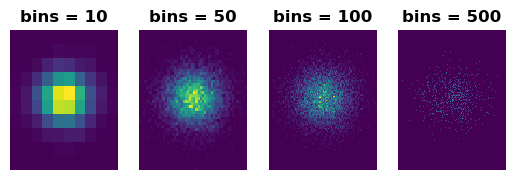

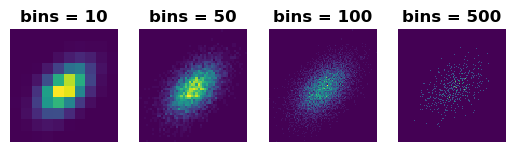

In [4]:
for d in (normal_md1, normal_md2):
    for idx, count in enumerate((10, 50, 100, 500)):
        plt.subplot(1,4,idx+1, aspect='equal')
        plt.title(f"bins = {count}")
        plt.axis('off')
        plt.hist2d(d[:,0], d[:,1], bins=count)
    plt.show()

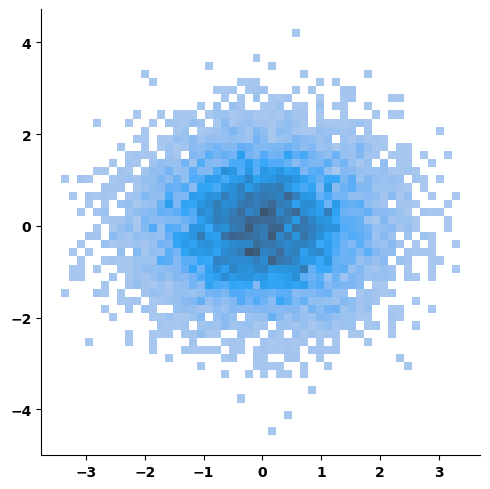

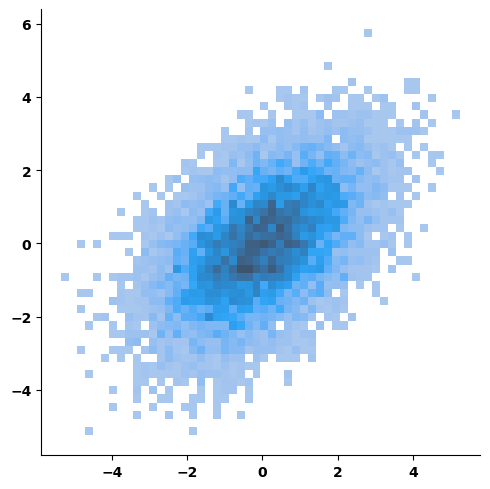

In [5]:
for d in (normal_md1, normal_md2):
    sns.displot(x=d[:, 0], y=d[:, 1], bins=50)

5.

In [6]:
SAMPLE_COUNT: int = 1000
sigma: np.ndarray = np.abs(np.random.normal(0, 1, SAMPLE_COUNT))
x: np.ndarray = np.random.normal(0, 3, SAMPLE_COUNT)
beta: np.ndarray = np.random.normal(.2, .2, SAMPLE_COUNT)
alpha: np.ndarray = np.random.normal(2, .1, SAMPLE_COUNT)

mu: np.ndarray = alpha + beta * x
y: np.ndarray = np.random.normal(mu, sigma)



6.

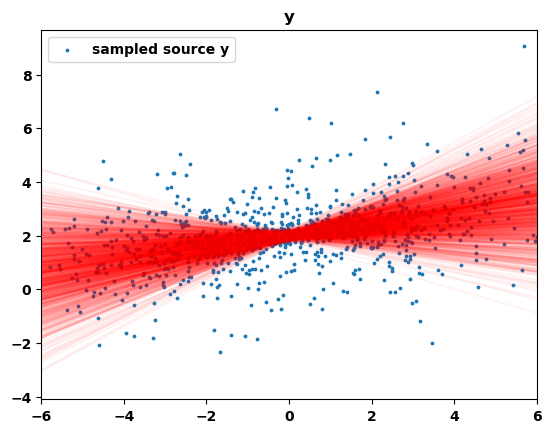

In [7]:
plt.figure()
plt.scatter(x, y, s=3, label="sampled source y")
domain = np.linspace(-6, 6).reshape((-1, 1))
plt.plot(np.ones((1, SAMPLE_COUNT)) * domain, domain * beta + alpha,  'r', alpha=0.05)
plt.xlim([-6, 6])
plt.title("y")
plt.legend()
plt.show()

